In [20]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [43]:
Base.classes.keys()

['measurement', 'station']

## D1: Determine the Summary Statistics for June

In [7]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

june = session.query(Measurement).filter(extract('month', Measurement.date) == 6)

In [8]:
#  3. Convert the June temperatures to a list.
june_temp_list = [temp.tobs for temp in june]
print(june_temp_list[:10])


[78.0, 76.0, 78.0, 76.0, 77.0, 78.0, 77.0, 78.0, 78.0, 79.0]


In [9]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
Jun_df = pd.DataFrame(june_temp_list,columns=['June Temps'])
Jun_df.head()

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [10]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
Jun_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


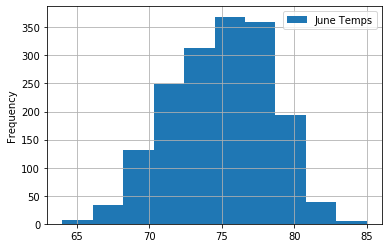

In [35]:
Jun_df.plot(figsize=(6,4), kind = 'hist', grid = True)


## D2: Determine the Summary Statistics for December

In [28]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec = session.query(Measurement).filter(extract('month', Measurement.date) == 12)

In [29]:
# 7. Convert the December temperatures to a list.
dec_temp_list = [temp.tobs for temp in dec]
print(dec_temp_list[:10])

[76.0, 74.0, 74.0, 64.0, 64.0, 67.0, 77.0, 66.0, 69.0, 68.0]


In [30]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
Dec_df = pd.DataFrame(dec_temp_list,columns=['December Temps'])
Dec_df.head()

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [31]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
Dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


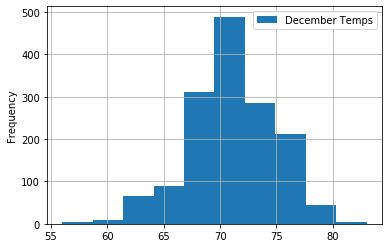

In [36]:
Dec_df.plot(figsize=(6,4), kind = 'hist', grid = True)

